**Analytical Question:**

1.What patterns or trends can be seen in crop yield data over time, and how can past yield data be used to predict yields in the future and help farmers choose crops and cultivate their land wisely?(Harika et al., 2877)

2.What are the main climatic parameters influencing successful agricultural growth, and how do varying climatic conditions across world regions affect the production of different crops?(Harika et al., 2877)

2.How can machine learning techniques be used to properly estimate crop yields under different environmental conditions? What are the primary traits or features that significantly affect crop yield prediction models?(Harika et al., 2877)




**Solution:**

Knowing how weather affects crop yield can help consumers, policymakers, and farmers all gain important insights. With the use of this data, farmers will be able to make well-informed choices on crop selection, planting dates, irrigation plans, and pest control techniques. Using this information, policymakers can create agricultural policies and support initiatives that effectively reduce the negative effects of unfavorable weather occurrences on crop productivity and food security. As agricultural productivity is maximized, consumers may benefit from more consistent food supply, higher-quality produce, and maybe lower pricing. In general, the examination of the yield_df dataset's weather-crop yield connections helps both agricultural stakeholders and the larger objective of guaranteeing food security and sustainability for the general public(Malhi, Kaur and Kaushik, 2021)..











**Abstract :**

A new technique called machine learning is used to comprehend the structure of data and fit it into models that may be used to make predictions in the future. The parameters in the data set selected for training the learning models may have an impact on the machine learning models' ability to forecast crop production in addition to the models themselves. The core of the Indian economy is agriculture. Predicting crop yields is a significant agricultural issue. Our proposed model uses supervised machine learning techniques to analyze multiple aspects such as crop type, state, season, and district (assuming same weather and soil conditions in a certain district) in order to forecast the crop yield in advance. This aids farmers in anticipating crop yields(Harika et al., 2877).

**Section One : Import Libraries and mounting the dataset.**

1.Importing all necessary libraries needed for the rest part of the code.
2.Mounting the datasets to the google colab from google drive.

In [500]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [501]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [502]:
%cd "/content/drive/My Drive/Colab"

/content/drive/My Drive/Colab


Note : https://stackoverflow.com/questions/35286540/how-to-display-an-image
The code is being inspired from this Stackoverflow website.
This workflow explains the overall working of this Data Analysis based on Crop Yield Prediction.It consist of 8 steps.

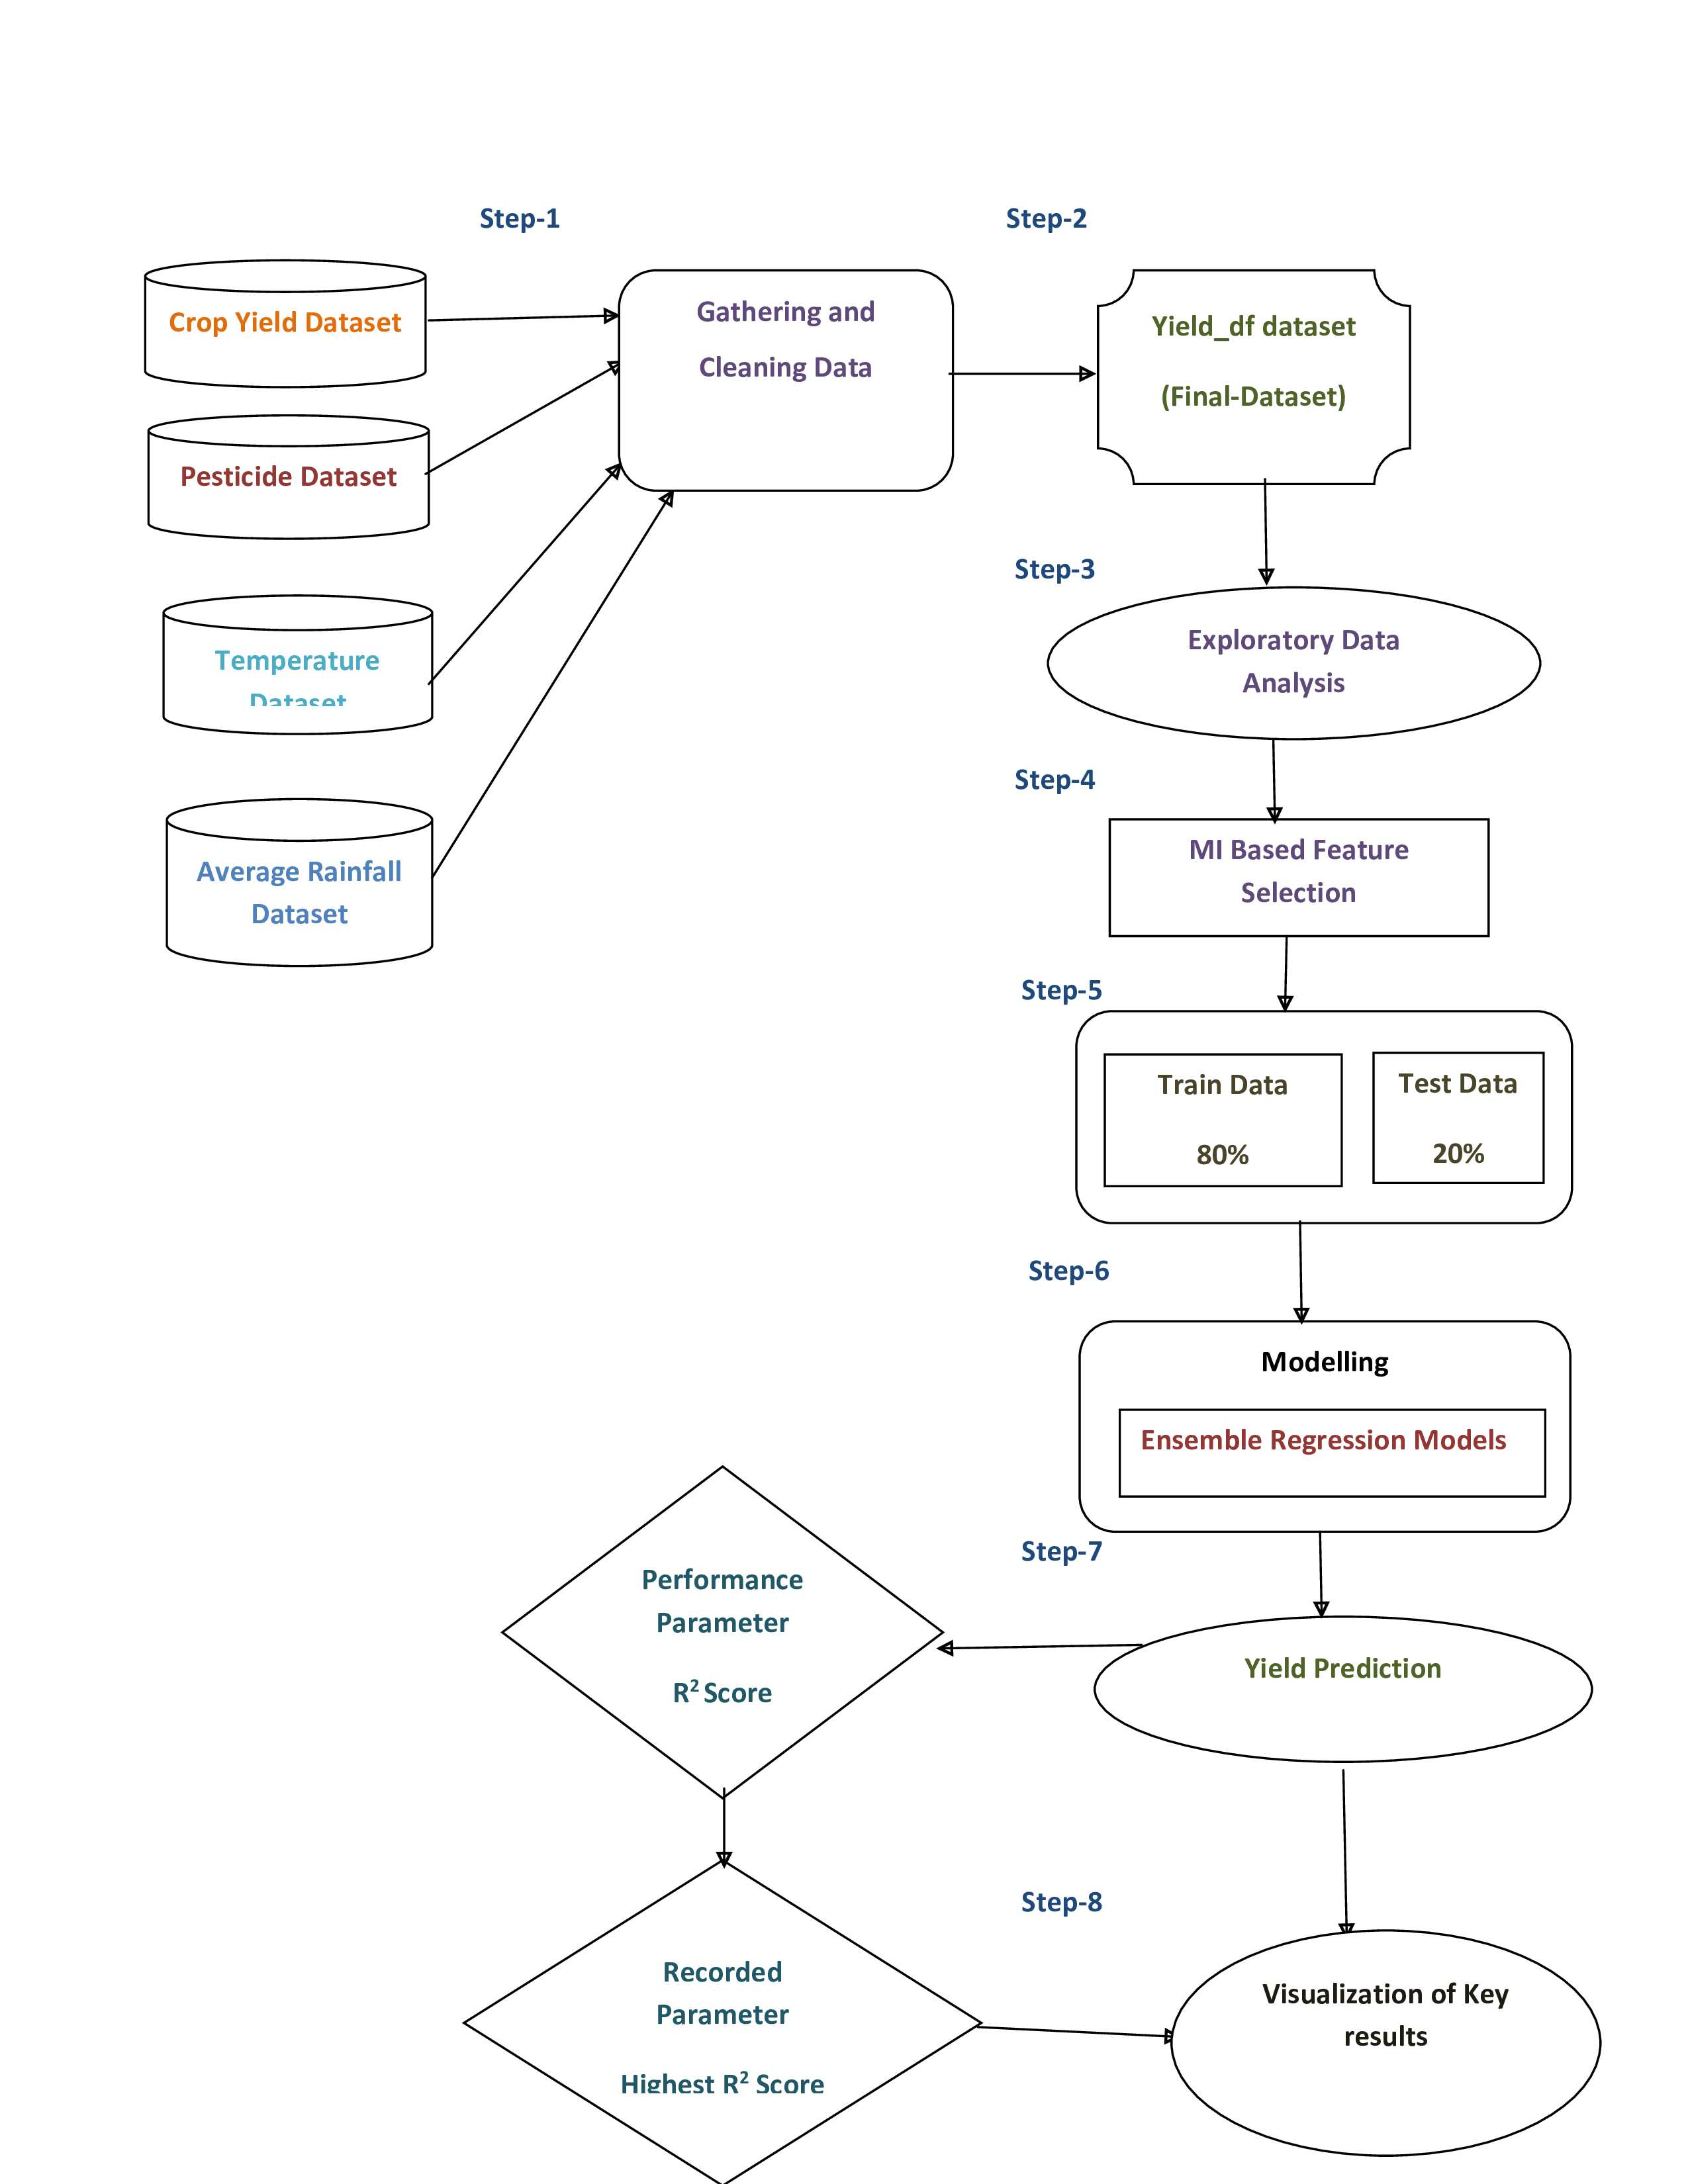

In [503]:
from IPython.display import display, Image
display(Image(filename='workflow.jpg',width = 650, height = 650))

**Section Two : Gathering and Cleaning the Data**

The first section is to gather all the dataset to get a final dataframe in which we perform all visualisations and other analysis for the rest of the part. In this section, all the four factors are invloved such as pesticide dataset, rainfall dataset, temperature dataset and yield dataset are all coordinated and all these datasets are cleaned to derive a final dataframe or dataset called yield_df.

**(A) Crop Yield Dataset:**

keyword used is **df_crop**

In [504]:
df_crop = pd.read_csv('yield.csv')
df_crop.shape

(56717, 12)

In [505]:
#displaying first 5 rows of the dataset.
df_crop.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


Rename Column : To make it clearer that this is the production value of our crop's yield, we can rename Value to hg/ha_yield by looking at the columns in the CSV file.

Dropping column : Apart from that we can eliminate unwanted columns such as Area Code, Domain, Item Code, etc.


Why we are renaming the column is that It has similar Values in other dataset and to make it understandable it is being renamed.

In [506]:
# rename columns.
df_crop = df_crop.rename(index=str, columns={"Value": "hg/ha_yield"})
df_crop.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


We are dropping the columns such as year code, Element , Area Code , Domain code, Domain , Unit, Item Code because it is nothing to do with the crop yield or production range . It is much more convenient to drop these columns to obtain a good dataframe.

In [507]:
# drop unwanted columns.
df_crop = df_crop.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_crop.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [508]:
df_crop.describe()
#df_crop.info()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


**(B) Rainfall Dataset - Climate Factor**

Keyword used is **df_climate**

In [509]:
df_climate = pd.read_csv('rainfall.csv')
df_climate.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


Note: This line is to ensure that the column Area remains the same for final dataset during merging after cleaning of data.

In [510]:
df_climate = df_climate.rename(index=str, columns={" Area": 'Area'})

#This line is to ensure that the column Area remains the same for final dataset during merging after cleaning of data.

In [511]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [512]:
# Convert NaN values to empty or other string

nan_value = float("NaN")
df_climate.replace("..", nan_value, inplace=True)

df_climate.dropna(subset = ["average_rain_fall_mm_per_year"], inplace=True)

In [513]:
# Convert the object dataframe to float value

df_climate["average_rain_fall_mm_per_year"] = pd.to_numeric(df_climate["average_rain_fall_mm_per_year"], downcast='float')

In [514]:
df_climate.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743286
std,9.526335,786.257324
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [515]:
# merge yield dataframe with rain dataframe by year and area columns
yield_df = pd.merge(df_crop, df_climate, on=['Year','Area'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [516]:
yield_df.describe()

# Constructing the final dataframe

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849731
std,9.143915,75213.292733,804.449402
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


***(C) Pesticide Dataset ***: Another influential agriculture factor

keyword used is **df_pest**

In [517]:
df_pest = pd.read_csv('pesticides.csv')
df_pest.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


Rename Column : To make it clearer that this is the production value of our pesticide , we can rename Value to pesticides_tonnes by looking at the columns in the CSV file.

Dropping column : Apart from that we can eliminate unwanted columns such as Element,Domain,Unit,Item etc.

In [518]:
df_pest = df_pest.rename(index=str, columns={"Value": "pesticides_tonnes"})
#rename
df_pest = df_pest.drop(['Element','Domain','Unit','Item'], axis=1)
#drop column
df_pest.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [519]:
# merge Pesticides dataframe with yield dataframe
yield_df = pd.merge(yield_df, df_pest, on=['Year','Area'])



**(D) Temperature Dataset** : Another climate related dataset

keyword used is **df_temp**

In [520]:
avg_temp=  pd.read_csv('temp.csv')
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [521]:
#rename the column name
avg_temp = avg_temp.rename(index=str, columns={"country":'Area',"year": "Year"})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [522]:
yield_df = pd.merge(yield_df, avg_temp, on=['Area','Year'])


**Section Three - Final Dataframe**

**yield_df** is the final dataframe merged from rainfall, crop yield, temperature and pesticide dataset.

In [523]:
yield_df.shape

(28242, 7)

In [524]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [525]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.055908,37076.909344,20.542627
std,7.051905,84956.612897,709.812134,59958.784665,6.312051
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19919.250000,593.000000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.000000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.000000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


**Section Four - Exploratory Data Analysis**


In [526]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


Note : Check for number of countries to find the top 10 highest yield prodcution of crops.

In [527]:
yield_df['Area'].nunique()

101

In [528]:
yield_df['Year'].nunique()

23

Note : By grouping the countries finding the Top 10 highest crop yielding countries.

In [529]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

**Data Visualisation for "Top 10 areas with Largest Crop yield":**

https://sites.google.com/view/paztronomer/blog/basic/python-colors colour code is from this link.

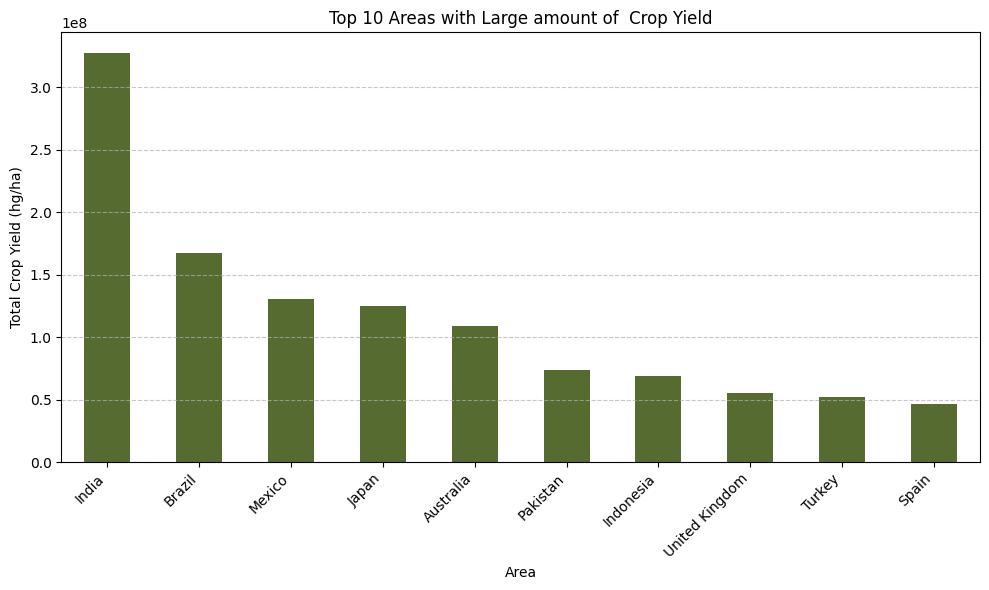

In [530]:
import matplotlib.pyplot as plt

# Group by 'Area', sum the 'hg/ha_yield', and get the top 10 largest values
top_10_areas = yield_df.groupby('Area')['hg/ha_yield'].sum().nlargest(10)

# Plot the visualization
top_10_areas.plot(kind='bar', color='darkolivegreen', figsize=(10, 6))

# Customize the plot
plt.title('Top 10 Areas with Large amount of  Crop Yield')
plt.xlabel('Area')
plt.ylabel('Total Crop Yield (hg/ha)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

This Visualization depicts that the range of crop yield all over the countries mentioned in final dataframe . This visualization helps in researching which has suitable land for crops to be implanted. The diagram itself specifies that India has much yield when compared to other countries which also explains that it has wide range of all types of crops that is being mentioned in the dataframe.

Note : By grouping the Item and Area finding which Country is producing much of its yield.

In [531]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

**Data Visualisation for "Top 10 Combinations of Crop Items and Areas by Crop Yield":**

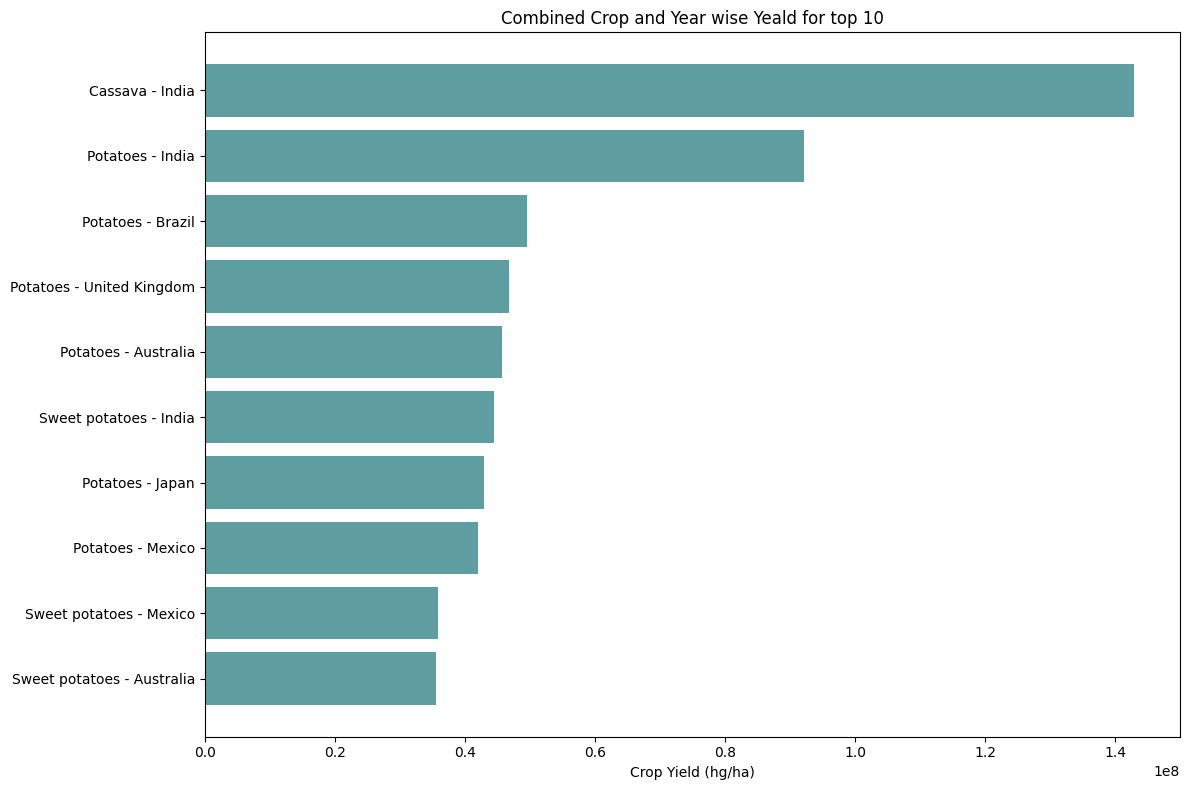

In [532]:
import matplotlib.pyplot as plt

# Group by 'Item' and 'Area', sum the 'hg/ha_yield', and get the top 10 largest values
top_10_combinations = yield_df.groupby(['Item', 'Area'])['hg/ha_yield'].sum().nlargest(10)

top_10_combinations = top_10_combinations.reset_index()

# Plot the visualization graph
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_10_combinations)), top_10_combinations['hg/ha_yield'], color='cadetblue')
plt.yticks(range(len(top_10_combinations)), [f"{item} - {area}" for item, area in zip(top_10_combinations['Item'], top_10_combinations['Area'])])
plt.xlabel('Crop Yield (hg/ha)')
plt.title('Combined Crop and Year wise Yeald for top 10')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Note : From the Data Visualisations we have noted that,India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries.The visualization is being visualized based on the crop yield of crops across the countries. This is to explain that it helps to detect which land is being suitable for type of crop. From this we can understand that which country has high yield of what crop.

**Data Visualisation for 'Crop Yield Over The Years'**

<ipython-input-533-8545d0a2227c>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Year', y='hg/ha_yield', data=yield_df,palette='Set2',color='darkolivegreen')


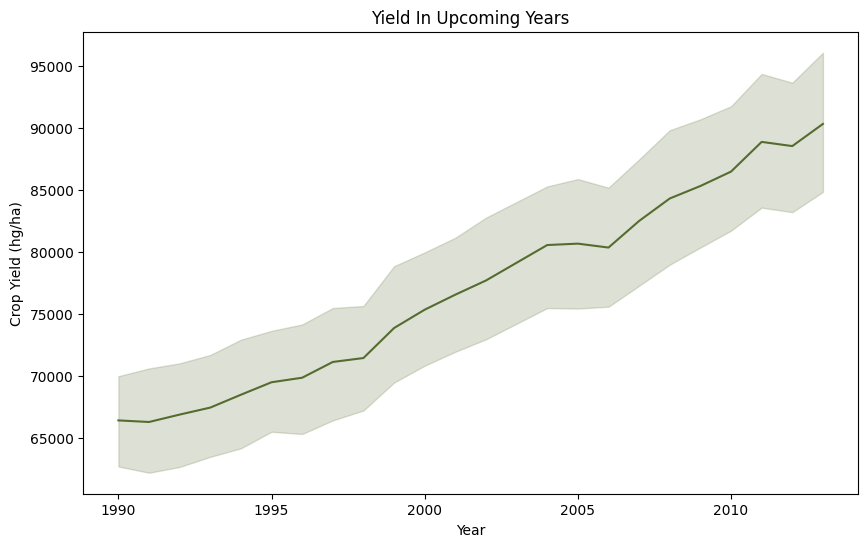

In [533]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for crop yield over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='hg/ha_yield', data=yield_df,palette='Set2',color='darkolivegreen')
plt.title('Yield In Upcoming Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield (hg/ha)')
plt.show()



This visualization depicts that the crop yield has been increased or not all over these upcoming years. This is constructed because to prove that agriculture is in stable positioning of the crop standards.

**Data Visualisation for 'Crop Yield Vs Average Rainfall'**

<ipython-input-534-1434d4a9377e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=yield_df, palette='virdis',color='burlywood')


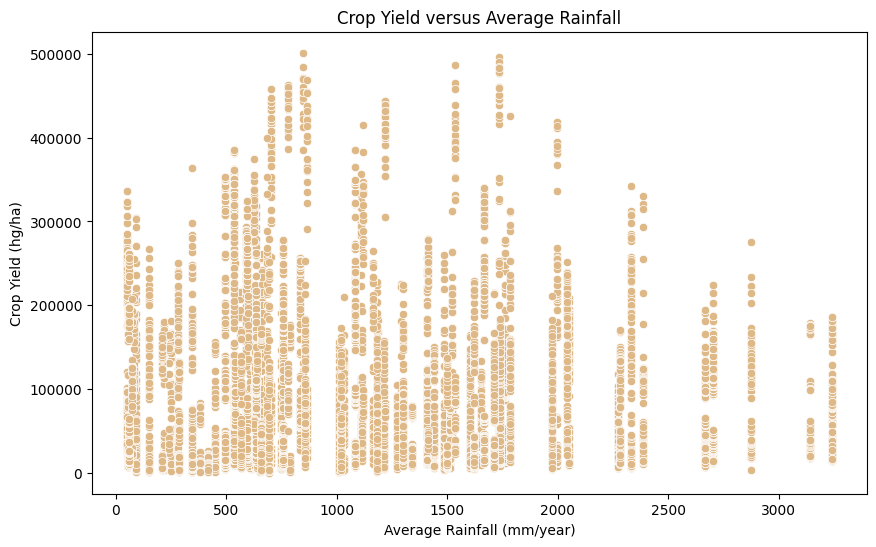

In [534]:
# Scatter plot for crop yield vs. average rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=yield_df, palette='virdis',color='burlywood')
plt.title('Crop Yield versus Average Rainfall')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Crop Yield (hg/ha)')
plt.show()

This scatterplot depicts that there is huge crop yield when there is more rainfall. So, the average rainfall is being taken into account because it is one of the influential and basic factor for a crop yield. So when there is average rainfall there is more or average yield when compare to less rainfall.

**Section Five - Correlation as Heatmap**

In [535]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


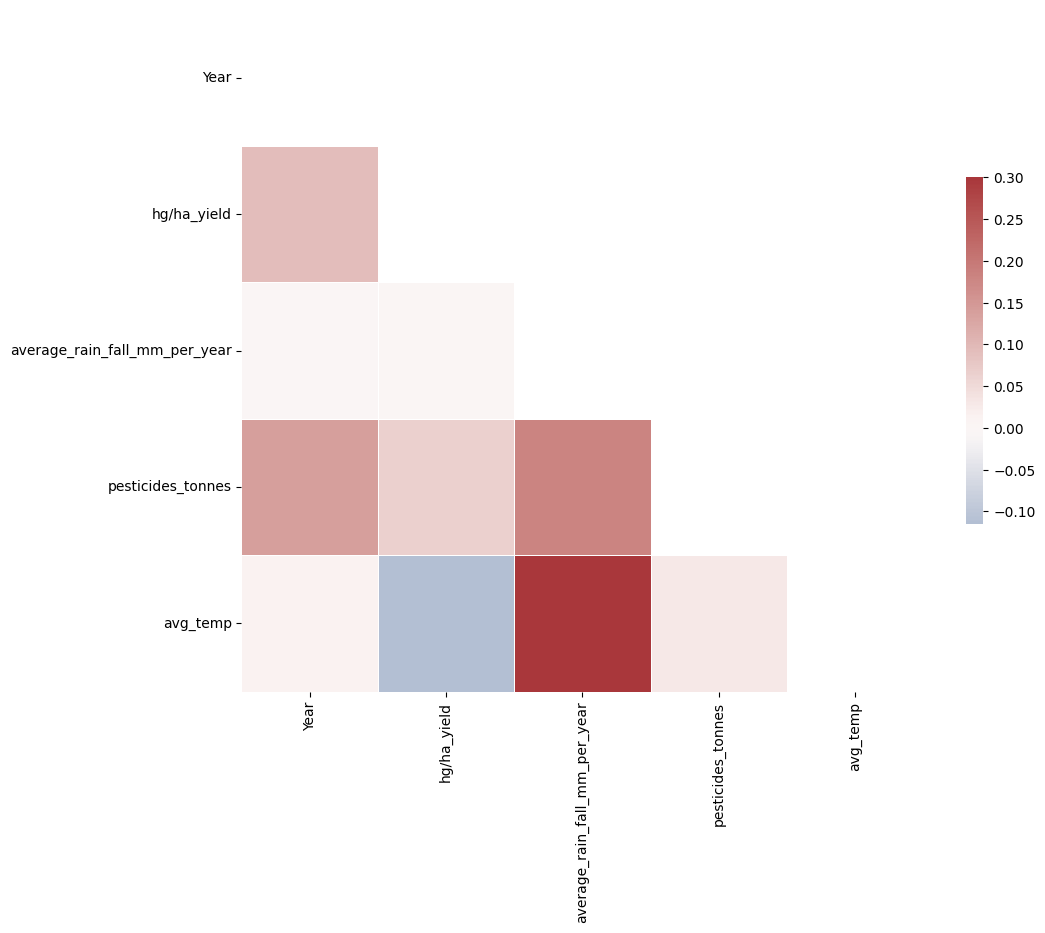

In [536]:
import numpy as np
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#github reference


Note: From above correlation heatmap it is found that there is no correlation between any of the columns of the dataframe. It is so because we have limited number of columns so each column is associated with output column but no desired relationship with each of other defined columns.The variables in the dataset may not change enough to reveal meaningful associations. Identifying correlations can be difficult if the data is excessively uniform or lacking variation.(Szabo, 2020).

**Section Six - Data Preprocessing**

**Encoding Categorical Variables:**

The dataframe contains two categorical columns, which are variables with label values rather than numeric values. In many cases, the number of possible values is limited to a specific set, such as the values for objects and nations. Many machine learning algorithms cannot work directly with labelled data. They require all input and output variables to be numerical.

This means that category data must be transformed into numerical form. One hot encoding is the process of converting categorical information into a form that may be used by ML algorithms to improve prediction accuracy. One-Hot Encoding will be used to turn these two columns into a single numeric array.

The category value is the numerical value of an entry in the dataset. This encoding generates a binary column for each category and produces a matrix with the results(Ali, 2023)..

In [537]:
yield_df['Item']

0                 Maize
1              Potatoes
2           Rice, paddy
3               Sorghum
4              Soybeans
              ...      
28237       Rice, paddy
28238           Sorghum
28239          Soybeans
28240    Sweet potatoes
28241             Wheat
Name: Item, Length: 28242, dtype: object

In [538]:
from sklearn.preprocessing import OneHotEncoder

This code creates new binary columns by performing one-hot encoding on the categorical columns "Area" and "Item" in DataFrame yield_df.This is done for regression algorithm, separating predictor variables (X) and the desired variable (Y) and removing the 'hg/ha_yield' column from predictors, since we already know that hg/ha_yield is the output column. The encoded data is shown in the generated X DataFrame.(Ali, 2023).

In [539]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
X=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
Y=yield_df['hg/ha_yield']
X.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [540]:
X = X.drop(['Year'], axis=1)

In this phase , we are dropping the Year column we are dealing with the country and item that has to be yielded which accordingly nothing to do with the year. And the further analysis is also based on Country and Item and not Year so to keeping it simple we are dropping the respective column ‘Year’.

In [541]:
X.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


**Scaling Features:** - **Normalization**

Scaling the numerical features to a similar range is commonly referred to as normalisation in the context of the yield_df dataset. This keeps features with higher magnitudes from controlling the model training process and guarantees that every feature contributes equally to the analysis.(Bhandari, 2020).

When working with machine learning methods that are sensitive to feature sizes, like support vector machines (SVM)  normalisation is extremely crucial.

Scaling variables like agricultural yield, average rainfall, pesticide use, and average temperature to a common range, like [0, 1] or [-1, 1], may be necessary for normalisation in the context of the yield_df dataset.(Bhandari, 2020).

Normalisation ensures that algorithms can learn from the data efficiently and are not influenced by feature size. It also makes the dataset more suited for analysis and modelling.(Bhandari, 2020).

The dataset shows significant variation in magnitudes, units, and ranges. Features with high magnitudes will be weighted more heavily in distance estimates than those with low magnitudes.(Bhandari, 2020).

To suppress this impact, we must bring all characteristics to the same magnitude level. This can be accomplished by scaling(Bhandari, 2020)..


In [542]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

This code scales the features in the 'X' variable using the scikit-learn MinMaxScaler. By transforming the features to fall inside a given range—typically between 0 and 1—MinMaxScaler ensures that all features have the same scale. We are doing this because we can compare with accuracy by using our SVM approach. It is utilized for several other distant calculative procedures in addition to the SVM technique. Each feature's minimum and maximum values are determined, and each feature is then scaled appropriately by deducting the minimum value and dividing by the range. For many machine learning algorithms, this normalization stage is crucial because it improves the algorithms' numerical stability, convergence speed, and performance.








In [543]:
X

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

**Training Data:**
Train and Split Data

In [544]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2)
print ('Train set:', X_train.shape)
print ('Test set:', X_test.shape)

Train set: (22593, 114)
Test set: (5649, 114)


**Section Seven - Model Selection** :

The system in this research uses machine learning approaches to forecast crop yield rate. Python is the programming language of choice since it is well-liked for implementing novel concepts in the field of machine learning. The gathered data set will be submitted for this project, and a crop yield estimate will be

produced by using machine learning techniques such as **decision tree regression, gradient boosting regression, and random forest regression.**
The information in the gathered data set determines the outcome. More accurate the parameter information in the gathered datasets, the better the outcomes will be.

Note: This is being inspired from the research paper.
https://www.irjmets.com/uploadedfiles/paper/issue_3_march_2023/34866/final/fin_irjmets1679985936.pdf

Logically to say that These three models greatly helps in researching the crop yield to much of extent.It is being scientifically proved and thus included in this model evaluation.

In [545]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_value = model.__class__.__name__
    fit=model.fit(X_train,Y_train)
    pred=fit.predict(X_test)
    r2=r2_score(Y_test,pred)
    return([model_value,r2])

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
   DecisionTreeRegressor()
]

model_train=list(map(compare_models,models))
print(*model_train, sep = "\n")

#github reference

['GradientBoostingRegressor', 0.893310447827514]
['RandomForestRegressor', 0.6701052595021173]
['DecisionTreeRegressor', 0.9654900203349966]


Note : Why Decision Tree Regression Tree has more accuracy?

The Decision Tree Regressor was chosen for the Crop yield_df dataset because of its capacity to handle the complicated, non-linear correlations found in agricultural data. Unlike linear regression models, decision trees can efficiently capture the interplay of different factors influencing crop output, such as weather, soil qualities, and agricultural techniques. This is critical in agriculture, where the link between input variables and crop production is frequently non-linear and affected by a variety of factors.

Furthermore, decision trees are highly interpretable, allowing stakeholders to better grasp the decision-making process and which factors are most relevant in crop yield prediction. Transparency is critical in agricultural decision-making, as farmers and policymakers require actionable facts to optimise crop output and resource allocation.

Furthermore, decision trees are resistant to outliers and can handle both numerical and categorical data, making them ideal for the diverse nature of agricultural information. Using the capabilities of decision tree regression, we can effectively model and estimate crop production based on a variety of agricultural parameters, resulting in more informed decision-making and resource management in agriculture.


In [546]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

why we are dropping the year is because the R2 score is purely depend on the Items of crops so to get the score the numeric column is being dropped.And only the categorical variables are taken into account.

In [547]:
plot_df['Country']=countries
plot_df['Item']=items


In [548]:
clf=DecisionTreeRegressor()
model=clf.fit(X_train,Y_train)

plot_df["yield_predicted"]= model.predict(X_train)
plot_df["yield_actual"]=pd.DataFrame(Y_train)["hg/ha_yield"].tolist()
test_group=plot_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
Cassava                 0.999456
Maize                   0.999824
Plantains and others    0.999653
Potatoes                0.999524
Rice, paddy             0.999596
Sorghum                 0.999884
Soybeans                0.999728
Sweet potatoes          0.999503
Wheat                   0.999590
Yams                    0.999688
dtype: float64

Using agricultural data, this code segment trains a Decision Tree Regressor model (clf). The dataset's features are probably contained in the X_train variable, while crop yield (hg/ha_yield), which appears to be the target variable in this instance, is stored in Y_train.

Based on the features in the training set, the model predicts the crop yield (yield_predicted) after training. The actual yield values, which are added to the plot_df dataframe as yield_actual, are then compared to these predictions and saved in Y_train.

The data is then grouped by item type (Item) in the code, which probably corresponds to various crops. The R-squared score for each group is then determined. The percentage of variance in the dependent variable (crop yield) that can be predicted from the independent variables (features) is measured by the R-squared score.

For each crop type, the scores that are obtained show how well the model fits the data. Strong fits are indicated by high R-squared values near 1, which imply that most crop kinds' actual yield values and the model's forecasts closely match each other. Through an examination of the model's performance on diverse crops, this analysis sheds light on how well the model predicts crop yields in a range of agricultural settings.









**Visualization of Key Result:**

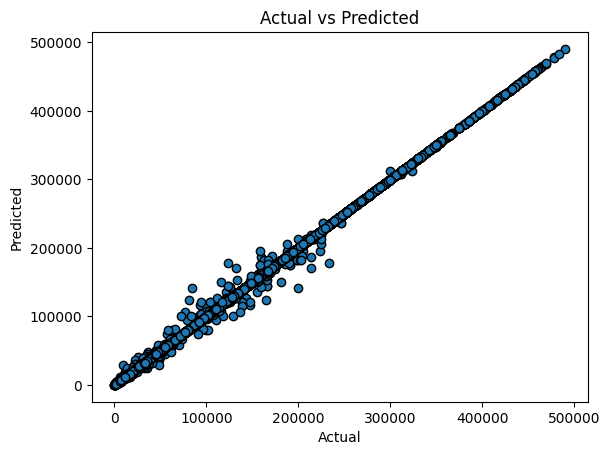

In [549]:
import matplotlib.pyplot as plt

# Create a scatter plot comparing actual and predicted crop yield values
plt.scatter(plot_df["yield_actual"], plot_df["yield_predicted"], edgecolors=(0, 0, 0))

# Set labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted")

# Display the plot
plt.show()

Note: The above figure displays the goodness of fit as a line based on the predictions. The excellent R Square score is evident. This indicates that we have discovered a well-fitting model to forecast the value of a given country's crop produce. The model's forecasts will likely be improved by including more factors, such as information on the climate, wind, pollution, the state of a particular nation's economy, and so forth.

In [550]:
varimp= {'imp':model.feature_importances_,'names':yield_df_onehot.columns[yield_df_onehot.columns!="hg/ha_yield"]}

<ipython-input-551-ac3f7a6e6a2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item', y='hg/ha_yield', data=yield_df,palette='Purples_r')


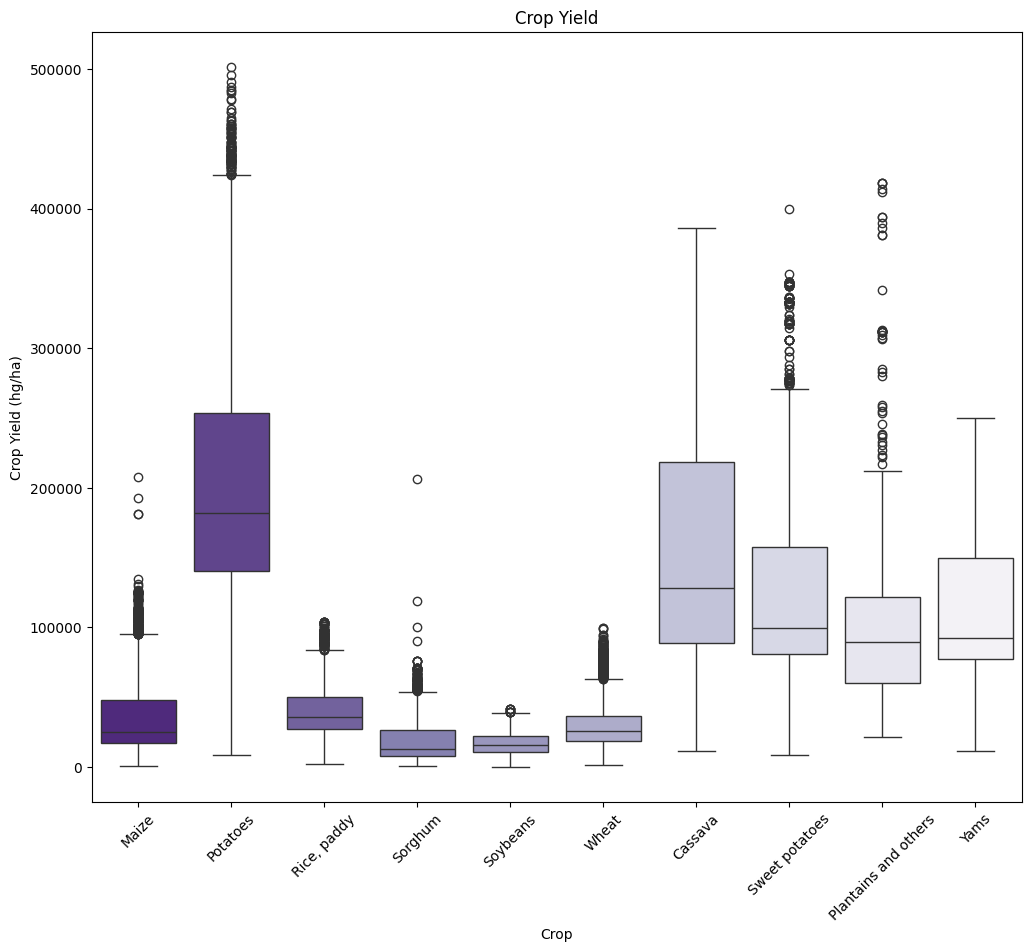

In [551]:
# Box plot for comparing crop yield across different crops
plt.figure(figsize=(12, 10))
sns.boxplot(x='Item', y='hg/ha_yield', data=yield_df,palette='Purples_r')
plt.title('Crop Yield')
plt.xlabel('Crop')
plt.ylabel('Crop Yield (hg/ha)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The distribution of crop yield data is probably visualized by the yield_df boxplot function. The dataset's median, quartiles, and any outliers are shown in a boxplot. The range is represented by each box, with a line inside each box depicting the median. Usually 1.5 times the range extend to the lowest and maximum values within a certain range. Plotting of outliers outside of this range is done separately. The yield distribution's central tendency and spread are briefly summarized in this graphic, which makes it easier to spot any notable deviations or outliers in the data.

<ipython-input-552-b3559f4de727>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="imp",y="names",palette="Greens",data=df,orient="h",ax=ax);


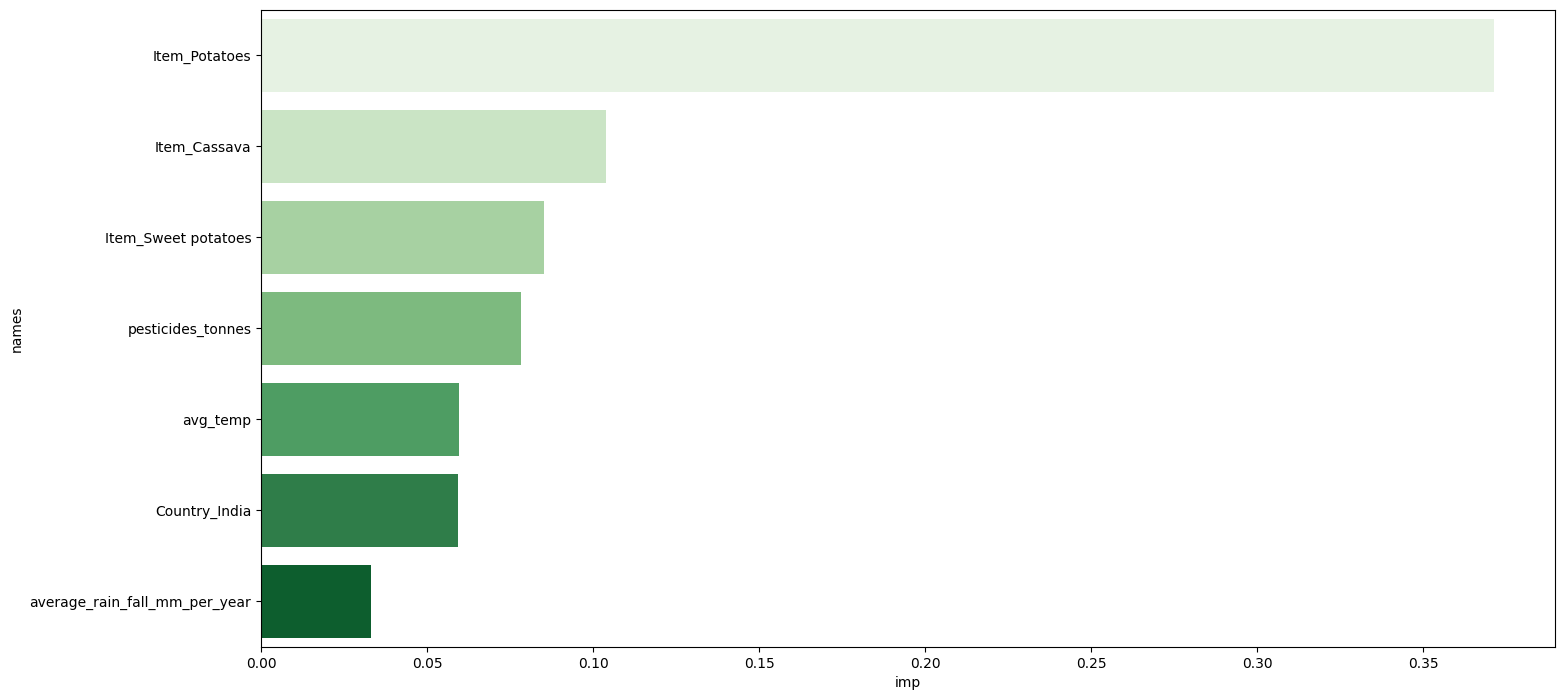

In [552]:
#7 most important factors that affect crops
dimension = (16.7, 8.27)

fig, ax = plt.subplots(figsize=dimension)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="Greens",data=df,orient="h",ax=ax);


The most important variables influencing crop yields are graphically represented by this code, which facilitates the identification and prioritization of these variables in agricultural decision-making.

Note: Given that potatoes are the highest crop in the dataset, they are given the most weight when generating decisions for the model. Cassava follows suit, showing the impact of pesticides as the third most significant characteristic. If sweet potatoes are the crop, we observe some of the highest crop values in terms of feature relevance within the dataset.

Given that India has the highest total of crops in the dataset, it makes sense if the crop is grown there. Next comes temperature and precipitation. The first hypothesis regarding these characteristics was accurate, as each of them significantly affects the model's predicted crop production.

**Conclusion or Solution to the Analytical Question:**

The goal of this project is to help farmers become more financially stable and to address the rising number of farmer suicides. Farmers can use this project to choose the highest producing and most suited crops to plant on their land and to achieve the desired output. Machine learning tools were utilized to gather, analyze, and train relevant datasets. This project advances the agricultural industry. A list of crops and their productions according to climate conditions is one of the project's most significant and original contributions. This innovative, clever method of crop yield prediction works well for computing precise results. If this innovative method is applied to the cultivation of crops, choosing which of crops for farmers.

**References:**


1.	Malhi, G.S., Kaur, M. and Kaushik, P. (2021). Impact of Climate Change on Agriculture and Its Mitigation Strategies: A Review. Sustainability, 13(3), p.1318. doi: https://doi.org/10.3390/su13031318.
2.	 Talaviya, T., Shah, D., Patel, N., Yagnik, H. and Shah, M. (2020). Implementation of artificial intelligence in agriculture for optimisation of irrigation and application of pesticides and herbicides. Artificial Intelligence in Agriculture, [online] 4(2589-7217). doi: https://doi.org/10.1016/j.aiia.2020.04.002.
3.	Ali, M. (2023). Handling Categorical Data in Python Tutorial. [online] www.datacamp.com. Available at: https://www.datacamp.com/tutorial/categorical-data.
4.	AlmaBetter. (n.d.). Popular Python Libraries - NumPy, Pandas, Seaborn, Sklearn. [online] Available at: https://www.almabetter.com/bytes/tutorials/python/popular-python-libraries.
5.	Amir (2023). Decision Trees with python code. [online] Medium. Available at: https://medium.com/@ab.jannatpour/decision-trees-with-python-code-380c020b088f[Accessed 12 May 2024].
6.	Bhandari, A. (2020). Feature Scaling | Standardization Vs Normalization. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/.
7.	Brownlee, J. (2020). Train-Test Split for Evaluating Machine Learning Algorithms. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/.
8.	Frost, J. (2018). How To Interpret R-squared in Regression Analysis. [online] Statistics By Jim. Available at: https://statisticsbyjim.com/regression/interpret-r-squared-regression/.
9.	GitHub. (n.d.). Crop-Yield-Production/crop_yield_prediction.ipynb at master · TheSaintIndiano/Crop-Yield-Production. [online] Available at: https://github.com/TheSaintIndiano/Crop-Yield-Production/blob/master/crop_yield_prediction.ipynb [Accessed 12 May 2024].
10.	Gupta, I., Ayalasomayajula, S., Shashidhara, Y., Kataria, A., Shashidhara, S., Kataria, K. and Undurti, A. (n.d.). Innovations in Agricultural Forecasting: A Multivariate Regression Study on Global Crop Yield Prediction. [online] Available at: https://arxiv.org/pdf/2312.02254 [Accessed 12 May 2024].
11.	Harika, B., Gayathri, N., Prasanthi, S., Sai Pramod, G. and Purna Teja, K. (2877). CROP YIELD PREDICTION USING DECISION TREE, RANDOM FOREST AND GRADIENT BOOSTING REGRESSION TECHNIQUES. [online] International Research Journal of Modernization in Engineering Technology and Science @International Research Journal of Modernization in Engineering, pp.2582–5208. Available at: https://www.irjmets.com/uploadedfiles/paper/issue_3_march_2023/34866/final/fin_irjmets1679985936.pdf
12.	jovian.com. (n.d.). Crop Yield Production Data Analysis - Notebook by Chalachew Muluken Liyew (chalachewsweet) | Jovian. [online] Available at: https://jovian.com/chalachewsweet/crop-yield-production-data-analysis [Accessed 12 May 2024].
13.	kaggle.com. (n.d.). Crop Yield Prediction. [online] Available at: https://www.kaggle.com/code/kushagranull/crop-yield-prediction
14.	Liliane, T.N. and Charles, M.S. (2020). Factors Affecting Yield of Crops. [online] www.intechopen.com. IntechOpen. Available at: https://www.intechopen.com/chapters/70658.
15.	Mahadevan, M. (2022). Step-by-Step Exploratory Data Analysis (EDA) using Python -. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/.
16.	scikit-learn (2019). sklearn.preprocessing.MinMaxScaler — scikit-learn 0.22.1 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html.
17.	Szabo, B. (2020). How to Create a Seaborn Correlation Heatmap in Python? [online] Medium. Available at: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e.
18.	www.ncl.ac.uk. (n.d.). Numeracy, Maths and Statistics - Academic Skills Kit. [online] Available at: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/data-presentation/box-and-whisker-plots.html.
